## Take home exercises




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [16]:
df


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,2018-06-22 04:00:00,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,2018-07-19 06:00:00,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,2018-06-16 16:00:00,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,2018-07-24 18:00:00,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [18]:
# Filtering only weekdays
df["hour_beginning"] = pd.to_datetime(df["hour_beginning"])
df_weekdays = df[df['hour_beginning'].dt.weekday < 5]
df_weekdays

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16051,2018-07-12 00:00:00,Brooklyn Bridge,77,39,38,partly-cloudy-night,72.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16052,2018-06-22 04:00:00,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,2018-07-19 06:00:00,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,2018-07-24 18:00:00,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


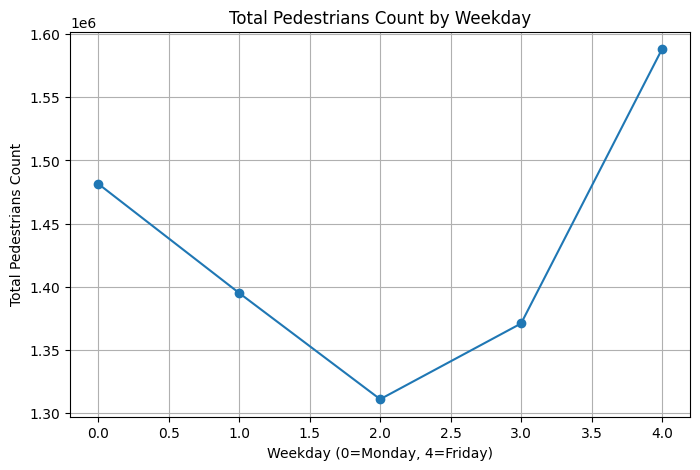

In [22]:
x_day = [0,1,2,3,4]
y_pedes_count = []

plt.figure(figsize=(8, 5))

for i in range(0,5):
    for_day = df[df["hour_beginning"].dt.weekday == i]
    y_pedes_count.append(np.sum(for_day["Pedestrians"]))

plt.plot(x_day,y_pedes_count,marker='o')
plt.title("Total Pedestrians Count by Weekday")
plt.xlabel("Weekday (0=Monday, 4=Friday)")
plt.ylabel("Total Pedestrians Count")
plt.grid(True)
plt.show()

In [24]:
df_2019 = df[df['hour_beginning'].dt.year == 2019]
df_2019_cleaned = df_2019[['weather_summary', 'Pedestrians']].dropna()

In [25]:
df_2019_encoded = pd.get_dummies(df_2019_cleaned, columns=['weather_summary'])

In [26]:
correlation_matrix = df_2019_encoded.corr()

In [28]:
import ace_tools as tools
tools.display_dataframe_to_user(name="2019 Encoded Data with Correlation Matrix", dataframe=correlation_matrix)


ModuleNotFoundError: No module named 'ace_tools'

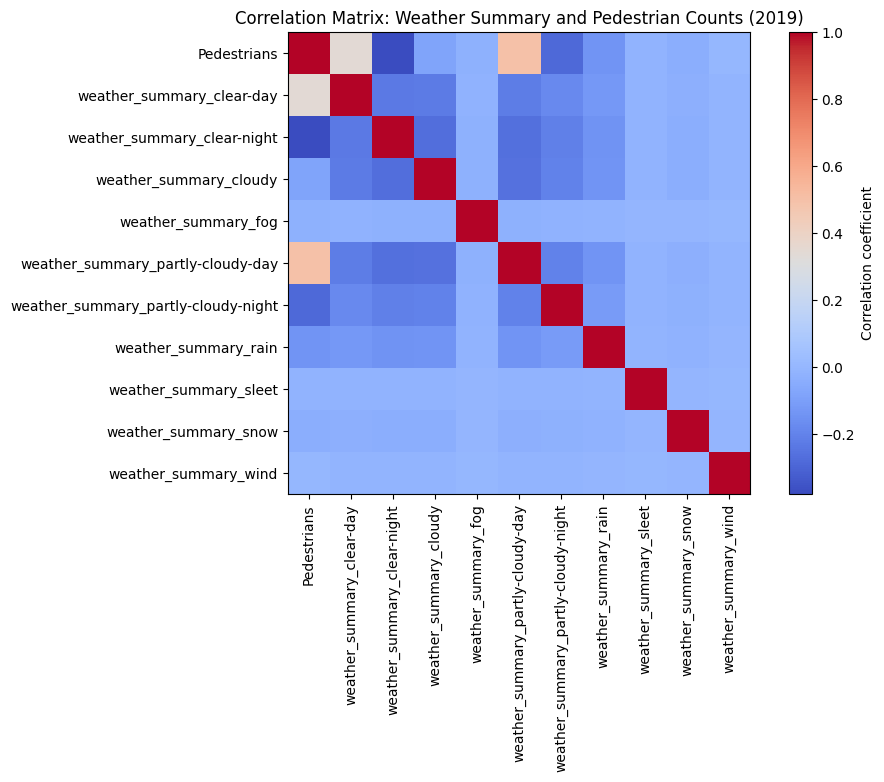

In [29]:
plt.figure(figsize=(10, 6))
plt.title("Correlation Matrix: Weather Summary and Pedestrian Counts (2019)")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.show()

In [30]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [31]:
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

In [32]:
activity_by_time_of_day = df.groupby('time_of_day')['Pedestrians'].sum()

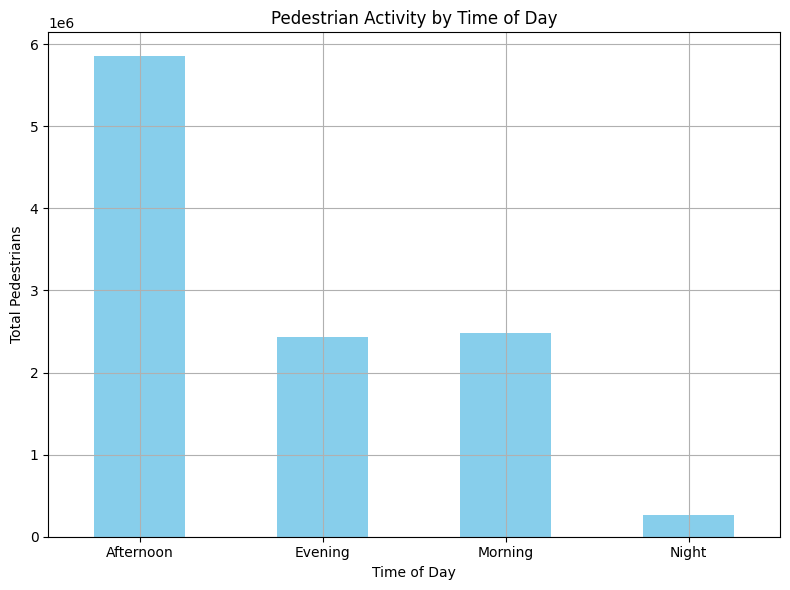

In [33]:
plt.figure(figsize=(8, 6))
activity_by_time_of_day.plot(kind='bar', color='skyblue')
plt.title('Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrians')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()